In [1]:
import numpy as np
import MDAnalysis as mda
import nmrformd as nmrmd

/home/simon/.local/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


In [2]:
import sys, os, git
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/examples/pyplot-perso/")
from color_series1 import colors
from functions import complete_panel, save_figure, set_boundaries, add_subplotlabels, set_boundaries
path_figures = "/docs/source/figures/tutorials/anisotropic-systems/"

In [3]:
from matplotlib import pyplot as plt

In [5]:
datapath = git_path + "/nmrformd-data/water-in-silica/raw-data/N50/"

In [6]:
u = mda.Universe(datapath+"prod.tpr", datapath+"prod.xtc")

In [7]:
n_molecules = u.atoms.n_residues
print(f"The number of molecules is {n_molecules}")
timestep = np.int32(u.trajectory.dt)
print(f"The timestep is {timestep} ps")
total_time = np.int32(u.trajectory.totaltime)
print(f"The total simulation time is {total_time} ps")

The number of molecules is 623
The timestep is 2 ps
The total simulation time is 10000 ps


In [19]:
H_H2O = u.select_atoms("name HW1 HW2")
H_SIL = u.select_atoms("name H")
H_ALL = H_H2O + H_SIL

In [20]:
nmr_H2O_SIL = nmrmd.NMR(u, atom_group = H_H2O,
                     neighbor_group = H_SIL, number_i=40, isotropic=False)
nmr_H2O_INTRA = nmrmd.NMR(u, atom_group = H_H2O, neighbor_group = H_H2O, number_i=40,
                          type_analysis = 'intra_molecular', isotropic=False)
nmr_H2O_INTER = nmrmd.NMR(u, atom_group = H_H2O, neighbor_group = H_H2O, number_i=40,
                          type_analysis = 'inter_molecular', isotropic=False)

In [22]:
R1_spectrum_H2O_SIL = nmr_H2O_SIL.R1
R1_spectrum_H2O_INTRA = nmr_H2O_INTRA.R1
R1_spectrum_H2O_INTER = nmr_H2O_INTER.R1
f = nmr_H2O_SIL.f

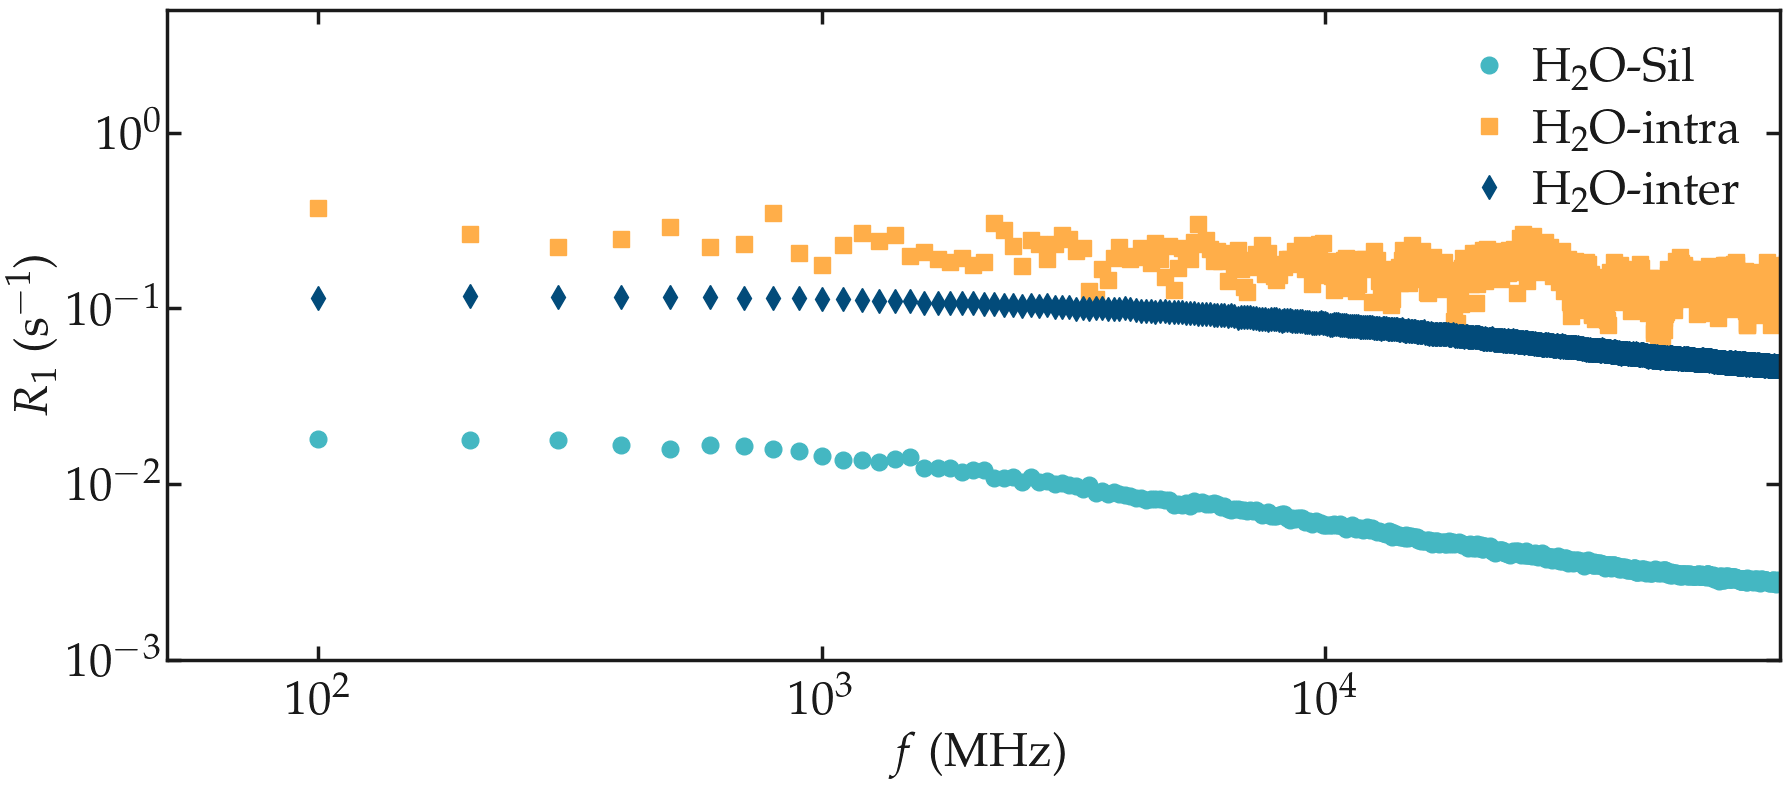

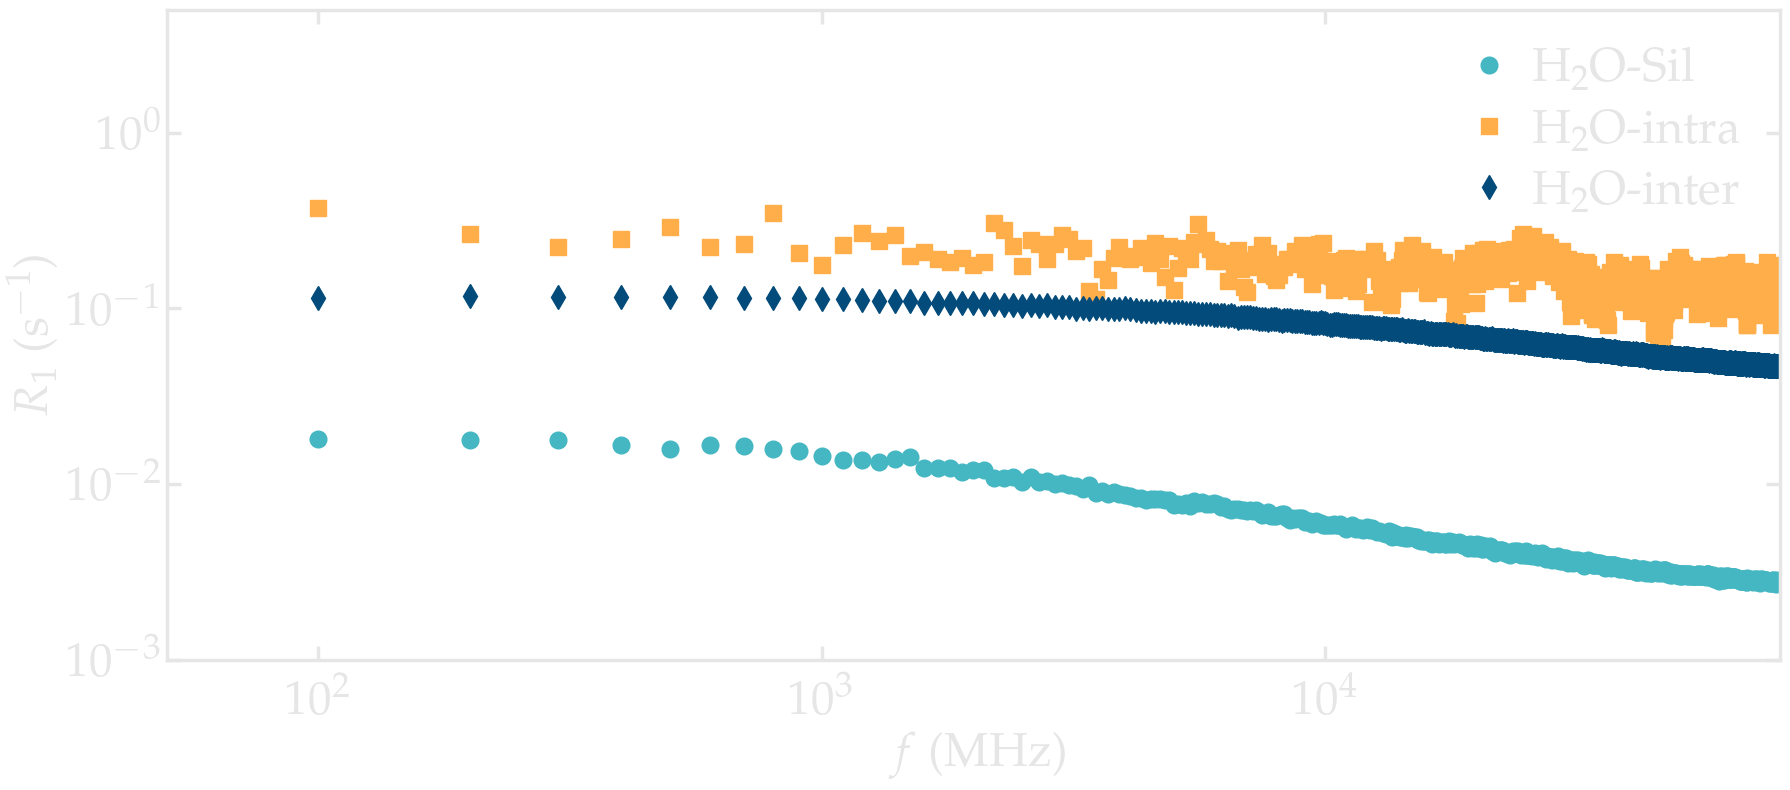

In [33]:
filename = "spectra"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,8))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].loglog(f, R1_spectrum_H2O_SIL, 'o', color=colors["mycyan"], markersize = 12, linewidth=4, label=r'H$_2$O-Sil')
    ax[-1].loglog(f, R1_spectrum_H2O_INTRA, 's', color=colors["myorange"], markersize = 12, linewidth=4, label=r'H$_2$O-intra')
    ax[-1].loglog(f, R1_spectrum_H2O_INTER, 'd', color=colors["mydarkblue"], markersize = 12, linewidth=4, label=r'H$_2$O-inter')
    complete_panel(ax[-1], r'$f$ (MHz)', r'$R_1$ (s$^{-1}$)', legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(5e1, 8e4), y_boundaries=(0.001, 5)) # x_ticks=np.arange(-1, 0.2, 0.2)
    # add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)